In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG, display, HTML
from graphviz import Source
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [3]:
style = '<style>svg{width:70% !important;height:70% !important;}</style>'
HTML(style)

Импортируем и выведем датасет.

In [3]:
titanic_data = pd.read_csv('Titanic/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Посмотрим сколько всего значений Null. Для удобства выведем сумму по столбцам

In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Удалим колонки которые скорее всего не немут информацию позволяющую определить утонет человек или нет
Затем присвоим игреку значения колонки которые мы пытаемся предсказать и формируем новый датасет

In [5]:
new_data = titanic_data.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = titanic_data.Survived
new_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Для формирования дерева решений необходимо привести все значения к численному виду
Для этого заполним пустые графы в колонке "возраст" средним значением возраста среди всех пассажиров

In [6]:
new_data = pd.get_dummies(new_data).fillna({'Age': new_data.Age.median()})
new_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


теперь создадим дерево решений критерием успешности которого является энтропия

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

Обучим дерево решения на нашем датасете

In [8]:
clf.fit(new_data, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Для улучшения дерева и проверки качества предсказания разделим датасет на обучающую и тестовую часть и обучим дерево только на обучающей части

In [9]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.33, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Посмотим, насколько точно дерево определяет утол человек или нет по Train выборке

In [10]:
clf.score(X_train, y_train)

0.9798657718120806

А теперь посмотрим, как хорошо дерево предсказывает утонет человек или нет на тестовой выборке

In [11]:
clf.score(X_test, y_test)

0.7627118644067796

Результаты сильно отличается, что может говорить о том, что дерево переобучено.
Попробуем ограничичть глубину дерева и посмотрим на изменение результата

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 5)

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
clf.score(X_train, y_train)

0.8406040268456376

In [15]:
clf.score(X_test, y_test)

0.8067796610169492

Значения улучшилось, что говорит о том, что мы движемся в правильном направлении. Теперь можно еще поиграться и поискать наилучшее значение глубины.

In [16]:
scores_data = pd.DataFrame()
scores_data.head()

""


Для поиска оптимального значения глубины переберем значения от 1 до 100 и отобращим результат на графике
Для отслеживания, результаты занесем в датафрейм scores_data

In [17]:
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score =  cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score = pd.DataFrame({'max_depth' : [max_depth], 
                               'train_score' : [train_score], 
                               'test_score' : [test_score],
                               'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score)

In [18]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'],
                                                           var_name = 'set_type', value_name = 'score')

In [19]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [20]:
scores_data_long.query('set_type == "cross_val_score"').head(10)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.795336
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.790266
207,10,cross_val_score,0.807073


Сфоримиуем график, на котором можно увидеть, как изменение параметров влияет на точность предсказания

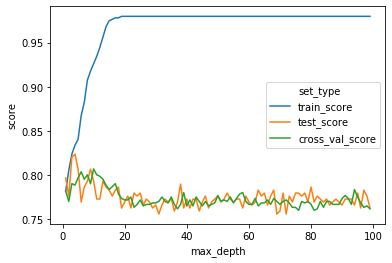

In [21]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [22]:
clf = tree.DecisionTreeClassifier(criterion  = 'entropy', max_depth = 4)
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [23]:
best_clf = tree.DecisionTreeClassifier(criterion  = 'entropy', max_depth = 10)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)


0.8

In [24]:
cross_val_score(best_clf, X_test, y_test, cv = 5)

array([0.86440678, 0.79661017, 0.81355932, 0.76271186, 0.72881356])

Задание 
Определить вид ириса

In [25]:
train_iris = pd.read_csv('train_iris.csv', index_col = 0)
test_iris = pd.read_csv('test_iris.csv', index_col = 0)

In [26]:
y = train_iris.species
train = train_iris.drop('species', 1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size = 0.33, random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
scores_data = pd.DataFrame()
np.random.seed(0)

In [29]:
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(random_state= 0, criterion='entropy', max_depth= max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    mean_cross_val_score =  cross_val_score(clf, x_train, y_train, cv = 5).mean()
    
    temp_score = pd.DataFrame({'max_depth' : [max_depth], 
                               'train_score' : [train_score], 
                               'test_score' : [test_score],
                               'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score)

In [30]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'],
                                                           var_name = 'set_type', value_name = 'score')

In [31]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.716418
1,2,train_score,1.000000
2,3,train_score,1.000000
3,4,train_score,1.000000
4,5,train_score,1.000000


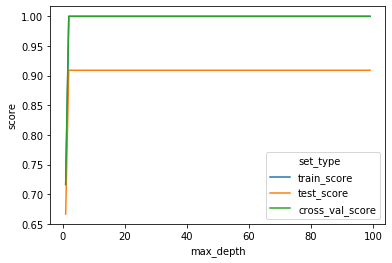

In [32]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [33]:
test_iris.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [34]:
y = test_iris.species
train = train_iris.drop('species', 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size = 0.33, random_state = 42)
clf.fit(x_train, y_train)

In [ ]:

for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(random_state= 0, criterion='entropy', max_depth= max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    mean_cross_val_score =  cross_val_score(clf, x_train, y_train, cv = 5).mean()
    
    temp_score = pd.DataFrame({'max_depth' : [max_depth], 
                               'train_score' : [train_score], 
                               'test_score' : [test_score],
                               'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score)

Задача не решена до конца, надо когда-нибудь вернуться к ней


Задача


предсказать кошке или собаке принадлежат наблюдения

In [6]:
df = pd.read_csv('dogs_n_cats.csv')
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [15]:
df_train = df.drop('Вид', 1)
y = df.Вид
# df_train.isnull().sum()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.33, random_state = 42)

In [18]:
scores_data = pd.DataFrame()
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score =  cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score = pd.DataFrame({'max_depth' : [max_depth], 
                               'train_score' : [train_score], 
                               'test_score' : [test_score],
                               'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score)

In [20]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'],
                                                           var_name = 'set_type', value_name = 'score')
scores_data_long.query('set_type == "cross_val_score"').head(10)

,max_depth,set_type,score
198,1,cross_val_score,1.0
199,2,cross_val_score,1.0
200,3,cross_val_score,1.0
201,4,cross_val_score,1.0
202,5,cross_val_score,1.0
203,6,cross_val_score,1.0
204,7,cross_val_score,1.0
205,8,cross_val_score,1.0
206,9,cross_val_score,1.0
207,10,cross_val_score,1.0


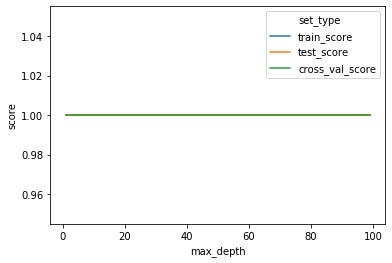

In [21]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [26]:
test_df = pd.read_json('dataset_209691_15.txt')

In [27]:
clf.predict(test_df).tolist().count('собачка')

58